# Data Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import json
import seaborn as sns

## Restaurant
We pick open restaurants in Austin with more than 10 reviews.

In [4]:
business = []

with open('drive/Shared drives/MATH156 Project/Data/yelp_academic_dataset_business.json') as file:
  for line in file:
      business.append(json.loads(line))

business = pd.DataFrame(business)
business = business.dropna()

In [5]:
restaurants = business[business['categories'].str.contains("Restaurants")]

open_restaurants = restaurants[restaurants['is_open']==1].reset_index(drop = True)

open_restaurants.groupby(['city']).agg({'review_count':'sum', 
                         'business_id':'size'}).sort_values(by = 'review_count', ascending = False).head(5)

,review_count,business_id
city,,
Austin,584233,2601
Portland,515699,2842
Atlanta,446299,2263
Boston,379893,1464
Orlando,357491,2263


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


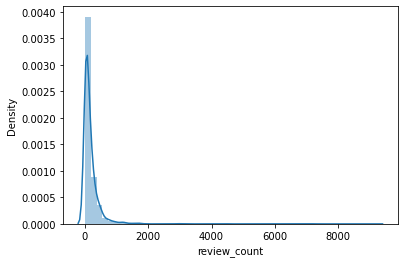

In [6]:
restaurants_in_Portland = open_restaurants[open_restaurants['city'] == 'Portland'].reset_index(drop = True)
sns.distplot(restaurants_in_Portland['review_count'])

In [7]:
restaurant_TO_10plus = restaurants_in_Portland.loc[restaurants_in_Portland['review_count'] >= 10]
restaurant_TO_10plu = restaurant_TO_10plus [restaurant_TO_10plus ['is_open']==1].reset_index(drop = True)
restaurant_final = restaurant_TO_10plus[['business_id', 'name', 'stars']]
restaurant_final = restaurant_final.rename(columns={'name':'business_name', 'stars':'business_stars'})

In [8]:
restaurant_final['business_name'].value_counts()

Subway                   37
McDonald's               21
Taco Bell                20
Domino's Pizza           10
Starbucks                 9
                         ..
108 Bar N Grill           1
Teo Bun Bo Hue            1
Poompui Thai Food         1
Uncle Tsang's Kitchen     1
Gumba                     1
Name: business_name, Length: 2331, dtype: int64

In [9]:
restaurant_final.isnull().sum()

business_id       0
business_name     0
business_stars    0
dtype: int64

## Review

In [10]:
review = pd.read_csv("drive/Shared drives/MATH156 Project/Data/yelp_review.csv")
review = review.dropna()

In [11]:
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [12]:
review_final = review[['review_id', 'business_id', 'stars', 'text']]
review_final = review_final.rename(columns={'stars':'review_stars', 'text':'review_text'})

## Merge
* We could further visualize the average rating if possible.

In [13]:
dataset = restaurant_final.merge(review_final, how='left', on='business_id', sort=True)

In [18]:
dataset = dataset.dropna()

In [19]:
dataset.head()

,business_id,business_name,business_stars,review_id,review_stars,review_text


In [17]:
dataset.isna().sum()
len(dataset)

2681

In [ ]:
avg_rating = pd.pivot_table(dataset, values='review_stars', index=['business_id'], columns=['business_stars'], aggfunc='mean')
avg_rating